In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv("result.csv")

In [23]:
df

,Probability,Threads,Time (seconds)
0,0.01,1,0.001207
1,0.02,1,0.001605
2,0.05,1,0.003873
3,0.01,2,0.001151
4,0.02,2,0.001311
5,0.05,2,0.002853
6,0.01,4,0.000781
7,0.02,4,0.000910
8,0.05,4,0.002427
9,0.01,8,0.000567


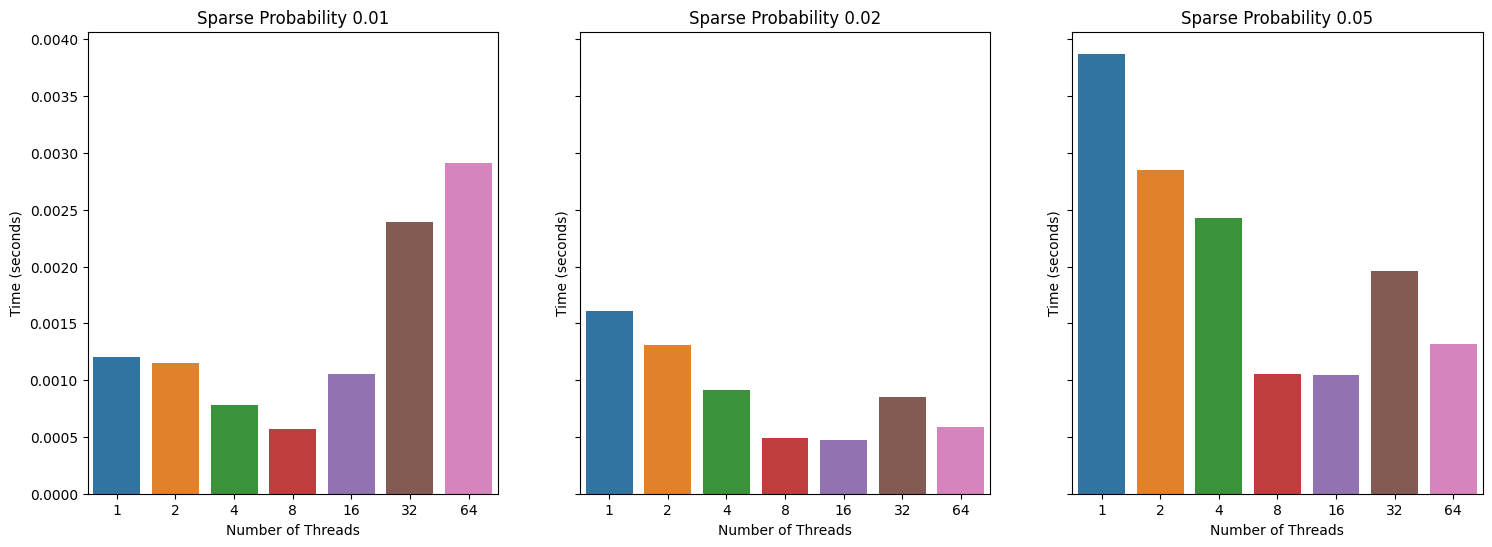

In [34]:
probabilities = [0.01, 0.02, 0.05]
fig, axes = plt.subplots(nrows=1, ncols=len(probabilities), figsize=(18, 6), sharey=True)

for ax, prob in zip(axes, probabilities):
    df_set = df[df['Probability'] == prob]
    sns.barplot(x='Threads', y='Time (seconds)', data=df_set, ax=ax)
    ax.set_xlabel('Number of Threads')
    ax.set_ylabel('Time (seconds)')
    ax.set_title(f'Sparse Probability {prob}')

# Save the subplot to a file
plt.savefig('sparse_probabilities_subplot.png')


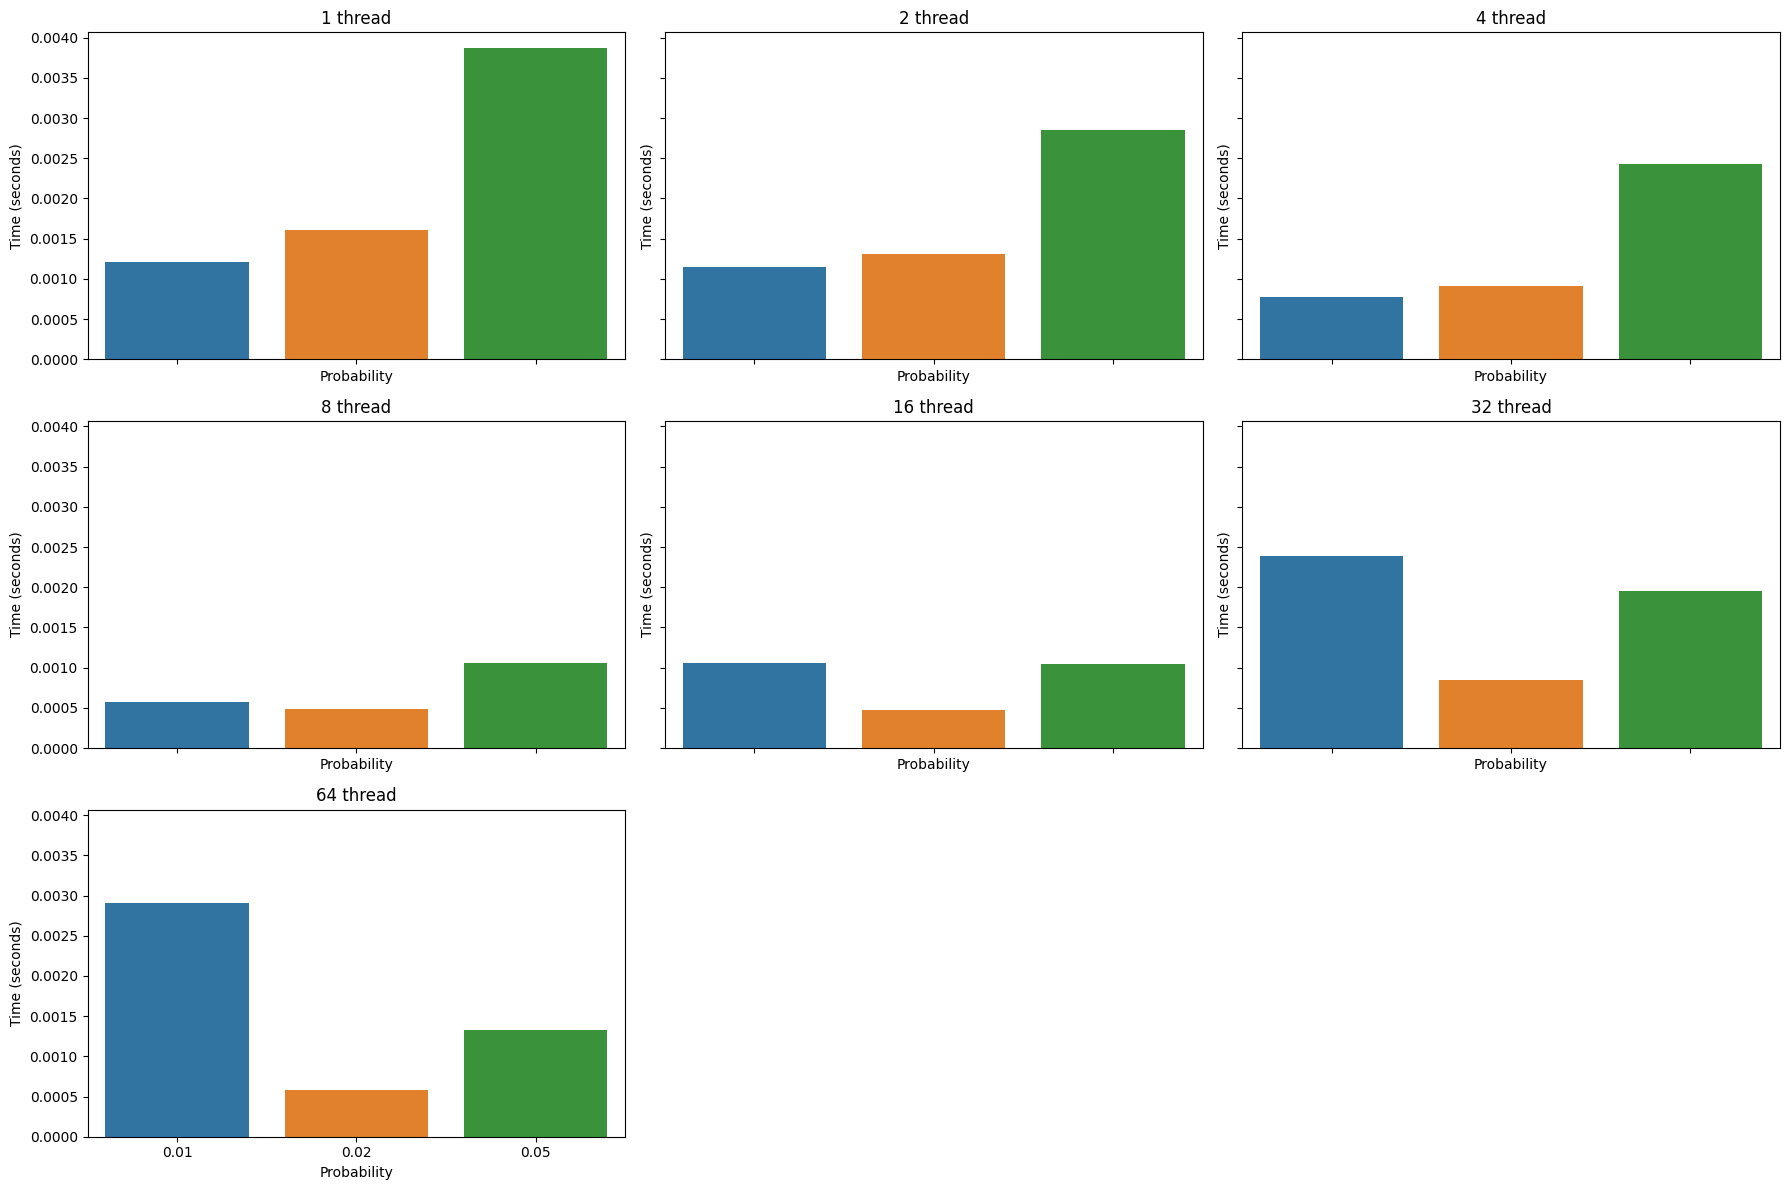

In [35]:
# Get unique thread numbers
thread_nums = df['Threads'].unique()

# Define the number of rows and columns for subplots (3x3 grid)
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the first 7 subplots (3x3)
for i, thread_num in enumerate(thread_nums):
    df_set = df[df['Threads'] == thread_num]
    sns.barplot(x='Probability', y='Time (seconds)', data=df_set, ax=axes[i])
    axes[i].set_xlabel('Probability')
    axes[i].set_ylabel('Time (seconds)')
    axes[i].set_title(f'{thread_num} thread')

# Hide any unused subplots (if fewer than 9 threads)
for j in range(len(thread_nums), len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
# Save the subplot to a file
plt.savefig('sparse_thread_subplot.png')
plt.show()